In [6]:
import mlxtend
import numpy as np
import pandas as pd

In [4]:
data=np.array([
    ['우유','기저귀','쥬스'],
    ['양상추','기저귀','맥주'],
    ['우유','양상추','기저귀','맥주'],
    ['양상추','맥주']
])

In [8]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_data=te.fit_transform(data)
df=pd.DataFrame(te_data,columns=te.columns_)

In [9]:
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [12]:
from mlxtend.frequent_patterns import apriori
apriori(df,min_support=0.5,use_colnames=True)

,support,itemsets
0,0.75,(기저귀)
1,0.75,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(우유, 기저귀)"
7,0.75,"(양상추, 맥주)"
8,0.50,"(맥주, 양상추, 기저귀)"


In [15]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
print(oh.fit_transform(df))


  (0, 1)	1.0
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 5)	1.0
  (2, 7)	1.0
  (2, 8)	1.0
  (3, 0)	1.0
  (3, 3)	1.0
  (3, 5)	1.0
  (3, 6)	1.0
  (3, 8)	1.0


## FP-Growth

In [16]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit_transform(data)
df=pd.DataFrame(te_ary,columns=te.columns_)

In [18]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df,min_support=0.5,use_colnames=te.columns_)

,support,itemsets
0,0.75,(기저귀)
1,0.50,(우유)
2,0.75,(양상추)
3,0.75,(맥주)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(맥주, 양상추, 기저귀)"
7,0.50,"(우유, 기저귀)"
8,0.75,"(양상추, 맥주)"


In [19]:
from nltk.tokenize import word_tokenize
print(word_tokenize("길고 노란 과일인 바나나를 먹고 싶어요. 저는 사과를 좋아해요"))

['길고', '노란', '과일인', '바나나를', '먹고', '싶어요', '.', '저는', '사과를', '좋아해요']


In [29]:
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()
text="길고 노란 과일인 바나나를 먹고 싶어요. 저는 사과를 좋아해요"
words=word_tokenize(text)

[n.lemmatize(w) for w in words]

['길고', '노란', '과일인', '바나나를', '먹고', '싶어요', '.', '저는', '사과를', '좋아해요']

In [31]:
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
[l.stem(w) for w in words]

['길고', '노란', '과일인', '바나나를', '먹고', '싶어요', '.', '저는', '사과를', '좋아해요']

In [34]:
text='I will swimming tomorrow. He has a nice voice.'
words=word_tokenize(text)
[n.lemmatize(w) for w in words]
[l.stem(w) for w in words]

['i', 'wil', 'swim', 'tomorrow', '.', 'he', 'has', 'a', 'nic', 'voic', '.']

In [35]:
from math import log

## Count Vectorizer

In [36]:
docs=[
    '먹고 싶은 사과',
    '먹고 싶은 바나나',
    '길고 노란 바나나 바나나',
    '저는 과일이 좋아요'
]


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
countvect=vect.fit_transform(docs)
c_ar=countvect.toarray()

In [42]:
vect.vocabulary_

{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [47]:
col=sorted(vect.vocabulary_)

In [50]:
df=pd.DataFrame(c_ar,columns=col)
df.index=['문서1','문서2','문서3','문서4']

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(df,df)

array([[1.        , 0.66666667, 0.        , 0.        ],
       [0.66666667, 1.        , 0.47140452, 0.        ],
       [0.        , 0.47140452, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
tfidf_vect=vect.fit_transform(docs)
t_ar=tfidf_vect.toarray()

In [56]:
col=sorted(vect.vocabulary_)

In [58]:
pd.DataFrame(t_ar,columns=col)

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


## 영화예제 실습

In [7]:
movies=pd.read_csv(r'C:\Users\PC\Desktop\새 폴더\tmdb_5000_movies.csv')
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [60]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [63]:
data=movies[movies['overview'].notnull()].reset_index(drop=True)
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [64]:
# 불용어 제거
tfidf=TfidfVectorizer(stop_words='english')

# overview에 대해 tf-idf수행
tfidf_matrix=tfidf.fit_transform(data['overview'])
print(tfidf_matrix)

  (0, 3545)	0.27493408760939525
  (0, 795)	0.20840248506428508
  (0, 14754)	0.26556742173634207
  (0, 13355)	0.25370648509953253
  (0, 7414)	0.2153566675807211
  (0, 19054)	0.23864578187786467
  (0, 12269)	0.177836951367994
  (0, 19671)	0.24152411449310068
  (0, 13644)	0.2924890615948194
  (0, 12411)	0.27155459041081664
  (0, 5519)	0.27863590795506266
  (0, 11667)	0.2580264572143277
  (0, 13680)	0.34114601990290067
  (0, 3232)	0.19885432485949403
  (0, 225)	0.30555754781353994
  (1, 14969)	0.27645087815814595
  (1, 18376)	0.3746713187753246
  (1, 6188)	0.27436965586712747
  (1, 19418)	0.30601817697124956
  (1, 6016)	0.19660617008509496
  (1, 6069)	0.2948266107022736
  (1, 8674)	0.28094519904255183
  (1, 11025)	0.12156539992654317
  (1, 3843)	0.19194810007303778
  (1, 4854)	0.19966652080493286
  :	:
  (4799, 5841)	0.34247262655528143
  (4799, 4576)	0.150025103277269
  (4799, 10126)	0.15121249151663257
  (4799, 16409)	0.17123631327764072
  (4799, 4816)	0.14223610899630587
  (4799, 1311)	

In [66]:
cosine_similarity(tfidf_matrix,tfidf_matrix).shape

(4800, 4800)

In [87]:
cosine_matrix=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [67]:
data['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4795                                 El Mariachi
4796                                   Newlyweds
4797                   Signed, Sealed, Delivered
4798                            Shanghai Calling
4799                           My Date with Drew
Name: title, Length: 4800, dtype: object

In [78]:
movie2id={}
for i,c in enumerate(data['title']):
    movie2id[i]=c
    
id2movie={}
for i,c in movie2id.items():
    id2movie[c]=i

In [83]:
movie2id.items()

dict_items([(0, 'Avatar'), (1, "Pirates of the Caribbean: At World's End"), (2, 'Spectre'), (3, 'The Dark Knight Rises'), (4, 'John Carter'), (5, 'Spider-Man 3'), (6, 'Tangled'), (7, 'Avengers: Age of Ultron'), (8, 'Harry Potter and the Half-Blood Prince'), (9, 'Batman v Superman: Dawn of Justice'), (10, 'Superman Returns'), (11, 'Quantum of Solace'), (12, "Pirates of the Caribbean: Dead Man's Chest"), (13, 'The Lone Ranger'), (14, 'Man of Steel'), (15, 'The Chronicles of Narnia: Prince Caspian'), (16, 'The Avengers'), (17, 'Pirates of the Caribbean: On Stranger Tides'), (18, 'Men in Black 3'), (19, 'The Hobbit: The Battle of the Five Armies'), (20, 'The Amazing Spider-Man'), (21, 'Robin Hood'), (22, 'The Hobbit: The Desolation of Smaug'), (23, 'The Golden Compass'), (24, 'King Kong'), (25, 'Titanic'), (26, 'Captain America: Civil War'), (27, 'Battleship'), (28, 'Jurassic World'), (29, 'Skyfall'), (30, 'Spider-Man 2'), (31, 'Iron Man 3'), (32, 'Alice in Wonderland'), (33, 'X-Men: The L

In [79]:
id2movie

{'Avatar': 0,
 "Pirates of the Caribbean: At World's End": 1,
 'Spectre': 2,
 'The Dark Knight Rises': 3,
 'John Carter': 4,
 'Spider-Man 3': 5,
 'Tangled': 6,
 'Avengers: Age of Ultron': 7,
 'Harry Potter and the Half-Blood Prince': 8,
 'Batman v Superman: Dawn of Justice': 9,
 'Superman Returns': 10,
 'Quantum of Solace': 11,
 "Pirates of the Caribbean: Dead Man's Chest": 12,
 'The Lone Ranger': 13,
 'Man of Steel': 14,
 'The Chronicles of Narnia: Prince Caspian': 15,
 'The Avengers': 16,
 'Pirates of the Caribbean: On Stranger Tides': 17,
 'Men in Black 3': 18,
 'The Hobbit: The Battle of the Five Armies': 19,
 'The Amazing Spider-Man': 20,
 'Robin Hood': 21,
 'The Hobbit: The Desolation of Smaug': 22,
 'The Golden Compass': 23,
 'King Kong': 24,
 'Titanic': 25,
 'Captain America: Civil War': 26,
 'Battleship': 27,
 'Jurassic World': 28,
 'Skyfall': 29,
 'Spider-Man 2': 30,
 'Iron Man 3': 31,
 'Alice in Wonderland': 32,
 'X-Men: The Last Stand': 33,
 'Monsters University': 34,
 'Tra

In [90]:
idx=id2movie['Avatar']
for i,c in enumerate(cosine_matrix[idx]):
    if i!= idx:
        print(i,c)

1 0.0
2 0.0
3 0.024994168620504714
4 0.0
5 0.030351187329780753
6 0.0
7 0.03758011683277065
8 0.0
9 0.0
10 0.0
11 0.01978593417667415
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.03496811912234604
27 0.047052294413836106
28 0.0
29 0.02518443306729142
30 0.0
31 0.06153279655869016
32 0.0
33 0.0
34 0.0
35 0.0
36 0.07454531937440456
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.021792943831263564
44 0.0
45 0.061148863420114975
46 0.0
47 0.033984161931472884
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.05604047588360021
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.05781284615947013
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.06410591376102813
84 0.0
85 0.0
86 0.0
87 0.02259076445409736
88 0.0
89 0.015147940337967564
90 0.0
91 0.033953239153233575
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 

1448 0.0
1449 0.0316023429228555
1450 0.0
1451 0.0
1452 0.0
1453 0.0
1454 0.0
1455 0.0
1456 0.0
1457 0.0
1458 0.0
1459 0.0
1460 0.0
1461 0.0
1462 0.0
1463 0.03372569220656732
1464 0.0
1465 0.0
1466 0.0
1467 0.04804060927053631
1468 0.0
1469 0.0
1470 0.0
1471 0.029463153275983627
1472 0.0
1473 0.017248059104253
1474 0.0
1475 0.0
1476 0.0
1477 0.0
1478 0.0
1479 0.0
1480 0.0
1481 0.0
1482 0.06070474340044241
1483 0.0
1484 0.0
1485 0.0
1486 0.0
1487 0.0
1488 0.0
1489 0.0
1490 0.0
1491 0.04083392043464585
1492 0.0
1493 0.0
1494 0.0
1495 0.0
1496 0.0
1497 0.0
1498 0.0
1499 0.0
1500 0.0
1501 0.0
1502 0.0
1503 0.0
1504 0.0
1505 0.0
1506 0.01988158859879733
1507 0.0
1508 0.0
1509 0.0
1510 0.0
1511 0.0
1512 0.0
1513 0.05403096654379565
1514 0.0
1515 0.0
1516 0.0
1517 0.0
1518 0.0
1519 0.0
1520 0.0
1521 0.0
1522 0.0
1523 0.0
1524 0.0
1525 0.021820063409030525
1526 0.0
1527 0.0
1528 0.04996590077386032
1529 0.02921411290098868
1530 0.0
1531 0.02012552384571226
1532 0.025859837311409877
1533 0.0
15

3052 0.0
3053 0.0
3054 0.0
3055 0.0
3056 0.0
3057 0.0
3058 0.0
3059 0.0
3060 0.0
3061 0.0
3062 0.0
3063 0.0
3064 0.0
3065 0.0
3066 0.0
3067 0.042912636402561
3068 0.0
3069 0.07624586993671727
3070 0.0
3071 0.0
3072 0.0
3073 0.0
3074 0.0
3075 0.0
3076 0.0
3077 0.0
3078 0.0
3079 0.0
3080 0.0
3081 0.0
3082 0.0
3083 0.0
3084 0.0
3085 0.0
3086 0.047465501393672525
3087 0.0
3088 0.0
3089 0.0
3090 0.0
3091 0.0
3092 0.0
3093 0.0
3094 0.0
3095 0.023086355206432038
3096 0.0
3097 0.036785731971293624
3098 0.0
3099 0.0
3100 0.0
3101 0.0
3102 0.0
3103 0.036226575706603176
3104 0.04026920094088533
3105 0.0
3106 0.0
3107 0.0
3108 0.0
3109 0.0
3110 0.0
3111 0.0
3112 0.0
3113 0.0
3114 0.0
3115 0.0
3116 0.0
3117 0.0
3118 0.0
3119 0.0
3120 0.0
3121 0.0
3122 0.0
3123 0.0
3124 0.0
3125 0.0
3126 0.0
3127 0.0
3128 0.0
3129 0.0
3130 0.0
3131 0.0
3132 0.0
3133 0.0
3134 0.0
3135 0.0
3136 0.0
3137 0.0
3138 0.0
3139 0.0
3140 0.0
3141 0.0
3142 0.0
3143 0.0
3144 0.0
3145 0.0
3146 0.0
3147 0.0
3148 0.0
3149 0.0
3150

4697 0.0
4698 0.0
4699 0.0
4700 0.0
4701 0.0
4702 0.0
4703 0.0
4704 0.0
4705 0.0
4706 0.0
4707 0.0
4708 0.0
4709 0.0
4710 0.0
4711 0.0
4712 0.0
4713 0.0
4714 0.0
4715 0.0
4716 0.0
4717 0.0
4718 0.0
4719 0.0
4720 0.0
4721 0.0
4722 0.0
4723 0.0
4724 0.0
4725 0.0
4726 0.0
4727 0.0
4728 0.0
4729 0.0
4730 0.0
4731 0.0
4732 0.0
4733 0.0
4734 0.0
4735 0.0
4736 0.0
4737 0.0
4738 0.0
4739 0.0
4740 0.0
4741 0.0
4742 0.0
4743 0.0
4744 0.0
4745 0.0
4746 0.0
4747 0.0
4748 0.0
4749 0.0
4750 0.0
4751 0.05849695073310036
4752 0.0
4753 0.0
4754 0.0
4755 0.0
4756 0.0
4757 0.0
4758 0.0
4759 0.0
4760 0.0
4761 0.0
4762 0.0
4763 0.0
4764 0.0
4765 0.0
4766 0.0
4767 0.0
4768 0.0
4769 0.0
4770 0.0
4771 0.0
4772 0.0
4773 0.0
4774 0.0
4775 0.0
4776 0.0
4777 0.0
4778 0.0
4779 0.0
4780 0.0
4781 0.0
4782 0.0
4783 0.0
4784 0.0
4785 0.0
4786 0.0
4787 0.0
4788 0.0
4789 0.0
4790 0.0
4791 0.0
4792 0.029174578205161155
4793 0.0421751495149188
4794 0.0
4795 0.0
4796 0.0
4797 0.0
4798 0.0
4799 0.0


In [98]:
idx=id2movie['Avatar']
sim_scores=[(i,c) for i, c in enumerate(cosine_matrix[idx]) if i!=idx]
sim_scores[0].keys()

AttributeError: 'tuple' object has no attribute 'keys'

In [101]:
sim_scores=sorted(sim_scores,key=lambda x : x[1],reverse=True)[0:10]

In [102]:
sim_scores

[(3603, 0.18680644400592625),
 (2130, 0.1701531508011452),
 (634, 0.13230802328648197),
 (1341, 0.12393168460279258),
 (529, 0.12248724483569524),
 (1610, 0.10469812534439568),
 (311, 0.10091458649805042),
 (847, 0.09799689295586646),
 (775, 0.09447978808500321),
 (2628, 0.09313865658182913)]

In [110]:
li=[]
for i,c in sim_scores:
    li.append(movie2id[i],c)
li

TypeError: append() takes exactly one argument (2 given)

In [105]:
[(movie2id[i],score) for i,score in sim_scores] 

[('Apollo 18', 0.18680644400592625),
 ('The American', 0.1701531508011452),
 ('The Matrix', 0.13230802328648197),
 ('The Inhabited Island', 0.12393168460279258),
 ('Tears of the Sun', 0.12248724483569524),
 ('Hanna', 0.10469812534439568),
 ('The Adventures of Pluto Nash', 0.10091458649805042),
 ('Semi-Pro', 0.09799689295586646),
 ('Supernova', 0.09447978808500321),
 ('Blood and Chocolate', 0.09313865658182913)]

## word2Vec

In [13]:
from gensim.models import word2vec

In [8]:
movie=movies[movies['original_title'].notnull()].reset_index(drop=True)

In [10]:
agg=movie.groupby(['id'])['original_title'].agg({'unique'})
agg.head()

,unique
id,
5,[Four Rooms]
11,[Star Wars]
12,[Finding Nemo]
13,[Forrest Gump]
14,[American Beauty]


In [18]:
sentence=[]
for user_sentence in agg['unique'].values:
    sentence.append(list(map(str,user_sentence)))

In [25]:
from gensim.models import word2vec
embedding_model=word2vec.Word2Vec(sentence, window=5,min_count=1,workers=4,sg=1)

In [27]:
embedding_model.wv.most_similar(positive=['Star Wars'], topn=10)

[('Subconscious', 0.4218931198120117),
 ('Red Riding: In the Year of Our Lord 1974', 0.31998756527900696),
 ('The Boy Next Door', 0.31713682413101196),
 ('Boat Trip', 0.312132328748703),
 ('The Black Stallion', 0.31122347712516785),
 ('Run All Night', 0.3089531362056732),
 ('El orfanato', 0.29416537284851074),
 ('Just Like Heaven', 0.27156224846839905),
 ('Laws of Attraction', 0.27143529057502747),
 ('Splash', 0.2709718644618988)]

In [44]:
!pip install plotnine==0.5.0

!pip install –upgrade pandas==0.23.4

!pip install folium==0.5.0

  Using cached mizani-0.7.3-py3-none-any.whl (63 kB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)


ERROR: Invalid requirement: '\u2013upgrade'


  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76255 sha256=8c69607be415d041d4c3484dc931abf477da79e65eaf1e9654c99a03c5d49663
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\ef\4c\4a\17fd3d7fb7b6243d5a7a8d165870cd5c6ad2ec4c0582f039e4
Successfully built folium


In [68]:
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
import os,sys,gc
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
books=pd.read_csv('books/books.csv')
book_tags=pd.read_csv('books/book_tags.csv')
ratings=pd.read_csv('books/ratings.csv')
tags=pd.read_csv('books/tags.csv')
to_read=pd.read_csv('books/to_read.csv')

In [113]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [114]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [115]:
#필요한 변수만 사용
books = books[['book_id', 'authors', 'title', 'ratings_count', 'average_rating', 'language_code']].reset_index(drop=True)

,count
authors,
A. Manette Ansay,1
A. Meredith Walters,2
"A.A. Milne, Ernest H. Shepard",6
A.C. Gaughen,1
A.G. Howard,2
...,...
منى المرشود,1
نور عبدالمجيد,1
ياسر حارب,1


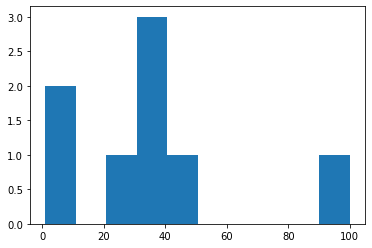

In [116]:
plt.hist(agg['count'])
plt.show()

In [117]:
agg=books.groupby('authors')['authors'].agg({'count'})
(ggplot(data = agg)
  + geom_histogram(aes(x='count'), binwidth = 1, fill = '#49beb7')
  + labs(title = "Number of the Author's Book",
         x = 'Book Count',
         y = 'Author Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

C:\Users\PC\anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):


AttributeError: 'str' object has no attribute 'shape'

In [118]:
print('책의 숫자:',books['book_id'].nunique())
print("저자의 숫자:", books['authors'].nunique(), "\n")
print(pd.DataFrame(agg['count'].describe()).T)

책의 숫자: 10000
저자의 숫자: 4664 

        count      mean       std  min  25%  50%  75%   max
count  4664.0  2.144082  3.414442  1.0  1.0  1.0  2.0  60.0


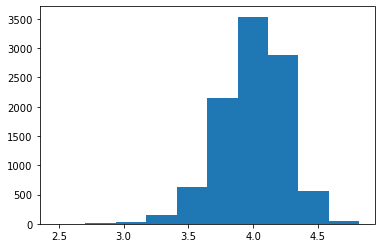

In [119]:
plt.hist(books['average_rating'])
plt.show()

In [120]:
(ggplot(data = books)
  + geom_histogram(aes(x='average_rating'), binwidth = 0.1, fill = '#49beb7')
  + labs(title = "Average Rating of the Books",
         x = 'Average Rating',
         y = 'Book Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

C:\Users\PC\anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):


AttributeError: 'str' object has no attribute 'shape'

In [121]:
books[books['average_rating']<=3].shape[0]

14

In [122]:
books.sort_values(by='average_rating',ascending=False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
3627,24812,Bill Watterson,The Complete Calvin and Hobbes,28900,4.82,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng
861,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",73572,4.77,eng
8853,95602,Francine Rivers,Mark of the Lion Trilogy,9081,4.76,en-US
7946,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,8953,4.76,eng


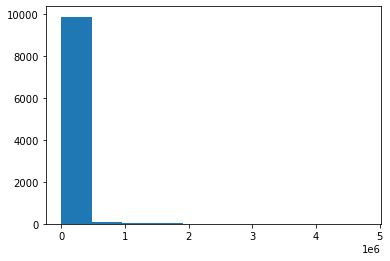

In [123]:
plt.hist(books['ratings_count'])
plt.show()

In [124]:
 books.sort_values(by='ratings_count',ascending=False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
0,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653,4.34,eng
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
2,41865,Stephenie Meyer,"Twilight (Twilight, #1)",3866839,3.57,en-US
3,2657,Harper Lee,To Kill a Mockingbird,3198671,4.25,eng
4,4671,F. Scott Fitzgerald,The Great Gatsby,2683664,3.89,eng


In [125]:
books['language_code'].isnull().sum()

1084

In [126]:
agg = pd.DataFrame(books['language_code'].value_counts()).reset_index()
agg.columns = ['language_code', 'count'] # 국적에 맞는 책을 추천해주는게 필요

In [127]:
ratings

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [128]:
# 실제 평점을 부여했지만 메타정보에 있는 책은 812건 밖에 안됨
# 집합으로 묶어서 뺀거
len(set(ratings['book_id'].unique()).difference(set(books['book_id'].unique())))

9188

In [129]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [130]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [131]:
book_tags = pd.merge(tags, book_tags, how='left', on='tag_id')
agg = book_tags.groupby(['tag_name'])['count'].agg({'sum'}).reset_index()
agg = agg.sort_values(by='sum', ascending=False).reset_index(drop=True)
agg.head()

,tag_name,sum
0,to-read,140718761
1,currently-reading,7507958
2,favorites,4503173
3,fiction,3688819
4,fantasy,3548157


In [132]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'count'}).reset_index()
agg.sort_values(by='count',ascending=False)

,user_id,count
12873,12874,200
30943,30944,200
52035,52036,199
12380,12381,199
28157,28158,199
...,...,...
8703,8704,2
34421,34422,2
20637,20638,2
34412,34413,2


In [133]:
books[books['book_id'].isin([1, 2, 3, 4, 5, 6, 7, 8])]

,book_id,authors,title,ratings_count,average_rating,language_code
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
17,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,1832823,4.53,eng
20,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,1735368,4.46,eng
23,6,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,1753043,4.53,eng
26,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,1678823,4.54,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng


In [134]:
ratings[(ratings['user_id'] == 314) & (ratings['book_id'].isin([1,2,3,4,5,6,7,8]))]

,book_id,user_id,rating
0,1,314,5
200,3,314,3
400,5,314,4
501,6,314,5


In [135]:
agg = ratings[ratings['book_id'].isin([1,2,3,4,5,6,7,8])].groupby(['user_id'])['book_id'].agg({'nunique'})
agg = agg.reset_index()
agg = agg.groupby(['nunique'])['user_id'].agg({'count'}).reset_index()
agg

,nunique,count
0,1,100
1,2,42
2,3,35
3,4,31
4,5,31
5,6,28
6,7,8
7,8,1


In [137]:
to_read['user_id'].nunique()

48871

In [142]:
agg=ratings.groupby('user_id')['book_id'].agg({'unique'}).reset_index()
agg

,user_id,unique
0,1,"[1180, 4893, 6285]"
1,2,"[8034, 8855, 9762]"
2,3,"[9014, 9049]"
3,4,"[3273, 3469, 8464]"
4,5,"[4829, 6646, 6703, 7487, 8072]"
...,...,...
53419,53420,"[4086, 4625, 5651, 6538, 9149, 9171]"
53420,53421,"[6076, 7278, 8194, 8513, 9254, 9334, 9498, 9727]"
53421,53422,"[1780, 1904, 2110, 2300, 2712, 3424, 3960, 407..."
53422,53423,"[4984, 8712]"


In [144]:
agg['train']=agg['unique'].apply(lambda x : np.random.choice(x,len(x)//2))

In [145]:
test = []
for i in tqdm(range(0, agg.shape[0])):
    test_rec = list(set(agg.loc[i, 'unique']).difference(set(agg.loc[i, 'train'])))
    test.append(test_rec)
agg['test'] = test

In [151]:
 test_map=agg[['user_id', 'test']]

In [155]:
test_map_unnest = np.dstack(
    (
        np.repeat(test_map.user_id.values, list(map(len, test_map.test))), 
        np.concatenate(test_map.test.values)
    )
)

test_map_unnest = pd.DataFrame(data = test_map_unnest[0], columns = test_map.columns)
test_map_unnest.head()

,user_id,test
0,1,1180
1,1,6285
2,2,8034
3,2,8855
4,3,9049


In [156]:
train_map = agg[['user_id', 'train']]

# unnest tags
train_map_unnest = np.dstack(
    (
        np.repeat(train_map.user_id.values, list(map(len, train_map.train))), 
        np.concatenate(train_map.train.values)
    )
)

train_map_unnest = pd.DataFrame(data = train_map_unnest[0], columns = train_map.columns)
train_map_unnest.head()

,user_id,train
0,1,4893
1,2,9762
2,3,9014
3,4,8464
4,5,8072


In [163]:
!pip install pandas==1.1.3

  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.3
    Uninstalling pandas-1.2.3:
      Successfully uninstalled pandas-1.2.3


In [166]:
train_map_unnest.columns = ['user_id', 'book_id']
test_map_unnest.columns = ['user_id', 'book_id']
train=train_map_unnest
test=test_map_unnest

In [167]:
train['book_id'] = train['book_id'].astype(str)
test['book_id'] = test['book_id'].astype(str)
books['book_id'] = books['book_id'].astype(str)

In [169]:
sol = test.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
gt = {}
for user in tqdm(sol['user_id'].unique()): 
    gt[user] = list(sol[sol['user_id'] == user]['unique'].values[0])

In [170]:
rec_df = pd.DataFrame()
rec_df['user_id'] = train['user_id'].unique()
rec_df

,user_id
0,1
1,2
2,3
3,4
4,5
...,...
53377,53420
53378,53421
53379,53422
53380,53423


In [172]:
books

,book_id,authors,title,ratings_count,average_rating,language_code
0,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653,4.34,eng
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
2,41865,Stephenie Meyer,"Twilight (Twilight, #1)",3866839,3.57,en-US
3,2657,Harper Lee,To Kill a Mockingbird,3198671,4.25,eng
4,4671,F. Scott Fitzgerald,The Great Gatsby,2683664,3.89,eng
...,...,...,...,...,...,...
9995,7130616,Ilona Andrews,"Bayou Moon (The Edge, #2)",17204,4.09,eng
9996,208324,Robert A. Caro,"Means of Ascent (The Years of Lyndon Johnson, #2)",12582,4.25,eng
9997,77431,Patrick O'Brian,The Mauritius Command,9421,4.35,eng
9998,8565083,Peggy Orenstein,Cinderella Ate My Daughter: Dispatches from th...,11279,3.65,eng


In [175]:
books=pd.read_csv('books/books.csv')
popular_rec_model=books.sort_values(by='books_count', ascending=False)['book_id'].values[0:500]

In [176]:
total_rec_list = {}
for user in tqdm(rec_df['user_id'].unique()):
    rec_list = []
    for rec in popular_rec_model[0:200]: 
        rec_list.append(rec)
    total_rec_list[user] = rec_list

In [177]:
import six
import math

# https://github.com/kakao-arena/brunch-article-recommendation/blob/master/evaluate.py

class evaluate():
    def __init__(self, recs, gt, topn=100):
        self.recs = recs
        self.gt = gt 
        self.topn = topn 
        
    def _ndcg(self):
        Q, S = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            dcg = 0.0
            idcg = sum([1.0 / math.log(i + 2, 2) for i in range(min(len(seen), len(rec)))])
            for i, r in enumerate(rec):
                if r not in seen:
                    continue
                rank = i + 1
                dcg += 1.0 / math.log(rank + 1, 2)
            ndcg = dcg / idcg
            S += ndcg
            Q += 1
        return S / Q


    def _map(self):
        n, ap = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            _ap, correct = 0.0, 0.0
            for i, r in enumerate(rec):
                if r in seen:
                    correct += 1
                    _ap += (correct / (i + 1.0))
            _ap /= min(len(seen), len(rec))
            ap += _ap
            n += 1.0
        return ap / n


    def _entropy_diversity(self):
        sz = float(len(self.recs)) * self.topn
        freq = {}
        for u, rec in six.iteritems(self.recs):
            for r in rec:
                freq[r] = freq.get(r, 0) + 1
        ent = -sum([v / sz * math.log(v / sz) for v in six.itervalues(freq)])
        return ent
    
    def _evaluate(self):
        print('MAP@%s: %s' % (self.topn, self._map()))
        print('NDCG@%s: %s' % (self.topn, self._ndcg()))
        print('EntDiv@%s: %s' % (self.topn, self._entropy_diversity()))


In [178]:
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 0.0


KeyboardInterrupt: 

In [182]:
train = pd.concat([train, books[['book_id', 'authors', 'ratings_count']]], axis=1)

In [183]:
train

,user_id,book_id,book_id,authors,ratings_count
0,1,4893,2767052.0,Suzanne Collins,4780653.0
1,2,9762,3.0,"J.K. Rowling, Mary GrandPré",4602479.0
2,3,9014,41865.0,Stephenie Meyer,3866839.0
3,4,8464,2657.0,Harper Lee,3198671.0
4,5,8072,4671.0,F. Scott Fitzgerald,2683664.0
...,...,...,...,...,...
477587,53424,1109,NaN,NaN,NaN
477588,53424,1109,NaN,NaN,NaN
477589,53424,7503,NaN,NaN,NaN
477590,53424,8609,NaN,NaN,NaN
